In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1. Overview

Feature detection là quá trình tìm ra các đặc trưng quan trọng của ảnh như cạnh, góc, các điểm lồi lõm.

### 2. Method

#### 2.1. Harris Corner Detection

Hiểu đơn giản là phương pháp phát hiện góc dựa trên gradient của ảnh. Góc có sự thay đổi đáng kể về cường độ pixel theo nhiều hướng.

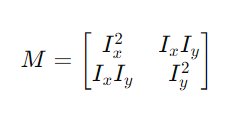

Ix, Iy là đạo hàm của ảnh theo x và y sử dụng hàm cv2.Sobel() để tính

R = det(M) - k(trace(M))^2

det(M) = lamda1 * lambda2

trace(M) = lambda1 + lambda2

- Nếu lambda1 có sự chênh lệch rất lớn thì thì vùng đó là cạnh
- Nếu lambda1 và lambda2 lớn và không chênh lệch nhiều thì vùng đó là góc
- Nếu lambda1 và lambda2 rất bé thì đó là vùng flat

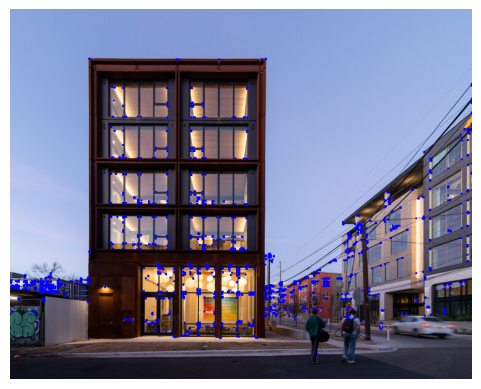

In [2]:
img = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/building.jpg')
img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
det = cv2.cornerHarris(gray, 2, 3, 0.04) # 2 là blockSize (Dùng vùng 2x2 để tính gradient), 3 là kernelSize khi áp dụng Sobel, 0.04 là số điều chỉnh Harris

det = cv2.dilate(det, None)

img1[det>0.02*det.max()]=[0,0,255]

plt.imshow(img1)
plt.axis('off')
plt.show()

In [8]:
print(det.max())

131686580.0


#### 2.2 Shi - Tomasi corner detector

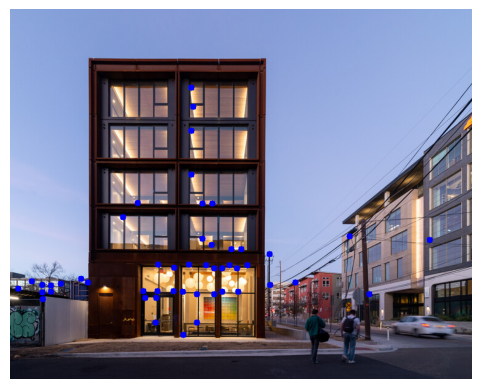

In [25]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

corners = cv2.goodFeaturesToTrack(gray, 50, 0.01, 10) # Hàm phát hiện tối đa 25 góc với mỗi góc có chất lượng bằng ít nhất 1% góc mạnh nhất và khoảng cách tối thiểu 2 góc là 10 pixel
corner_int = np.int32(corners)
for i in range(len(corner_int)):
    for x, y in corner_int[i]:
        cv2.circle(img2, (x, y), 5, (0, 0, 255), -1)

plt.imshow(img2)
plt.axis('off')
plt.show()

In [23]:
for x, y in corner_int[1]:
    print(x, y)

385 415


#### 2.3. SIFT (Scale-invariant feature transform)

2 phương pháp bên trên được coi là rotation-invariant tức là góc sẽ luôn là góc nếu nó bị xoay, tuy nhiên góc có thể không còn là góc nếu nó bị phóng to lên -> Người ta đề xuất SIFT algorithm.

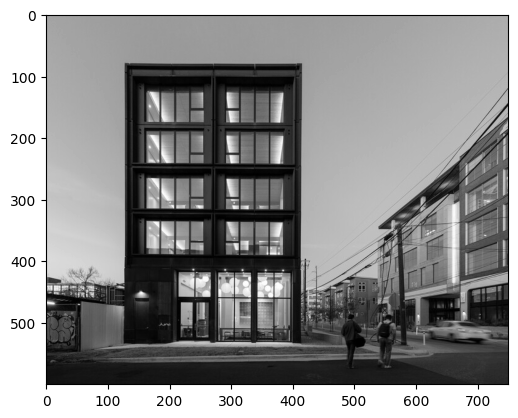

In [27]:
plt.imshow(gray, 'gray')

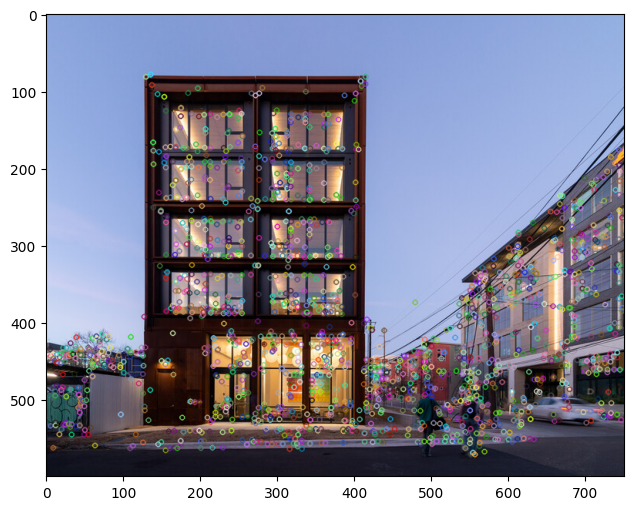

In [34]:
img3 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray1 = np.uint8(gray)

sift = cv2.SIFT_create()
keypoints, descriptor = sift.detectAndCompute(gray1, None)

img3 = cv2.drawKeypoints(img3, keypoints, None)

plt.figure(figsize=(12, 6))
plt.imshow(img3)
plt.show()

In [35]:
print(descriptor)

[[  8.  54. 109. ...  51.   0.   0.]
 [  0.   0.   2. ...   0.   0.   0.]
 [ 11.  68.  55. ...  10.  11.   0.]
 ...
 [  0.   0.   0. ...  31.   0.  10.]
 [  0.   0.   0. ...   0.   0.   2.]
 [  0.   0.   0. ...  28.   0.   1.]]


#### 2.4. FAST

Thuật toán FAST xác định điểm góc bằng cách kiểm tra sự thay đổi của cường độ pixel xung quanh 1 điểm ảnh nhất định

Các bước:
- Chọn 1 pixel ảnh có toạ độ (x, y), gọi cường độ của điểm ảnh là Ip.
- So sánh Ip với 16 pixel nằm xung quanh nó, nếu có n pixel liên liếp (n thường lớn 12) có giá trị sáng hơn Ip+t hoặc tối hơn Ip-t (Với t là ngưỡng cường độ quyết định điểm đó có phải góc hay không) thì Ip là điểm góc.
- FAST kiểm tra nhanh để loại bỏ sớm các điểm không phải góc để tăng tốc độ xử lý: Chọn 4 điểm để kiểm tra, nếu không có 3 điểm trở lên thoả mãn điều kiện sáng tối thì điểm không phải là góc, nếu có 3 điểm trở lên trong 4 điểm thoả mãn thì kiểm tra 12 điểm còn lại.
- Loại bỏ các điểm dư thừa bằng NMS.

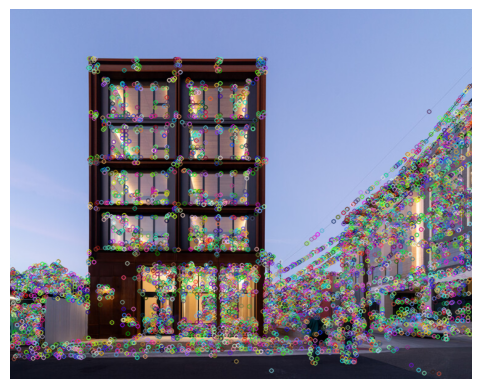

In [39]:
img4 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray4 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fast = cv2.FastFeatureDetector_create()
points = fast.detect(gray4, None)

img4 = cv2.drawKeypoints(img4, points, None)

plt.imshow(img4)
plt.axis('off')
plt.show()

#### 2.5. ORB

BRIEF (Binary Robust Independent Elementary Features) là một descriptor (bộ mô tả đặc trưng) được sử dụng để mã hóa đặc trưng dưới dạng vector nhị phân, giúp giảm kích thước dữ liệu và tăng tốc độ xử lý. Tuy nhiên BRIEF không phải rotation-invariant, thuật toán ORB được sinh ra nhờ sự kết hợp của thuật toán FAST tìm keypoint và BRIEF tìm descriptor, loại bỏ điểm yếu bằng Harris corner measure và khắc phục điểm yếu về rotation của BRIEF bằng cách gán góc xoay cho mỗi keypoint bằng cách sử dụng mo-men đăc trưng

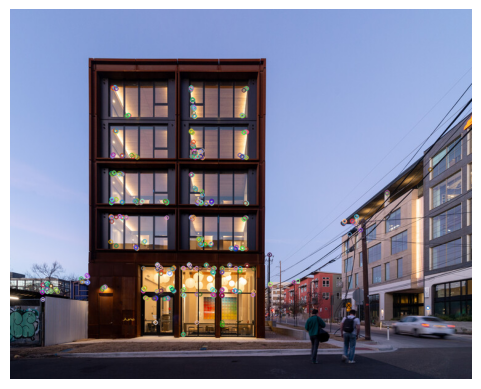

In [4]:
img5 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray5 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

orb = cv2.ORB_create()
points, descriptor = orb.detectAndCompute(gray5, None)

img5 = cv2.drawKeypoints(img5, points, None)

plt.imshow(img5)
plt.axis('off')
plt.show()

### 3. Feature Matching

#### 3.1. Brute-force Matcher

Brute-force matcher là phương pháp lấy 1 descriptor của 1 feature ở 1 tập và matched với tất cả các descriptor trong tập còn lại và sử dụng 1 số phương pháp tính toán khoảng cách, khoảng cách ngắn nhất sẽ được chọn.

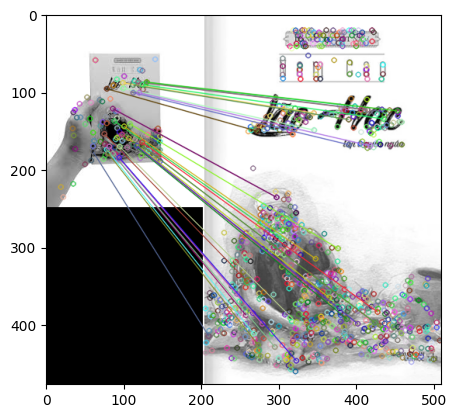

In [12]:
img1 = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/feature_matching1.jpg', 0)
img2 = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/feature_matching2.png', 0)

sift = cv2.SIFT_create()

kp1, ds1 = sift.detectAndCompute(img1, None)
kp2, ds2 = sift.detectAndCompute(img2, None)

bf = cv2.BFMatcher_create()
matches = bf.knnMatch(ds1, ds2, 2)

good = []
for m, n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])

img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good, None)

plt.imshow(img3, 'gray')
plt.show()

#### 3.2. Feature Matching + Homography to find object

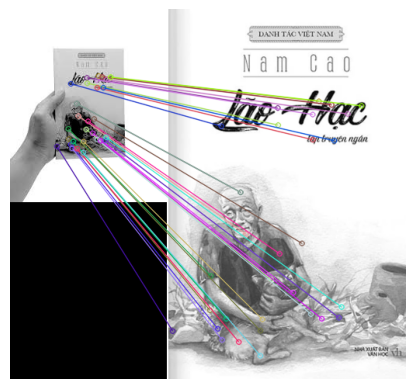

In [14]:
img1 = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/feature_matching1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('C:/Users/DELL/PycharmProjects/DL/ATV_Training/2_OpenCV/data/feature_matching2.png', cv2.IMREAD_GRAYSCALE)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance: 
        good_matches.append(m)

src_pts = np.float32([kp1[m.queryIdx].pt for m in good_matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in good_matches]).reshape(-1, 1, 2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h, w = img1.shape
pts = np.float32([[0, 0], [0, h], [w, h], [w, 0]]).reshape(-1, 1, 2)

dst = cv2.perspectiveTransform(pts, H)

img2 = cv2.polylines(img2, [np.int32(dst)], True, (255, 0, 0), 3, cv2.LINE_AA)

result = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

